# **CreateMnistModel**

## Check the library version.

In [1]:
import tensorflow
print(tensorflow.__version__)

2.3.0


## Create MNIST model

11493376/11490434 [==============================] - 0s 0us/step

●ネットワーク定義
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
______________________________________________

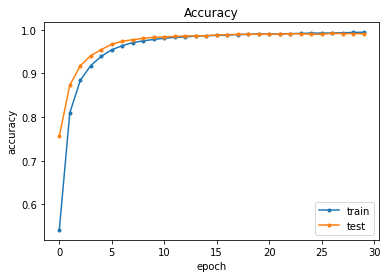

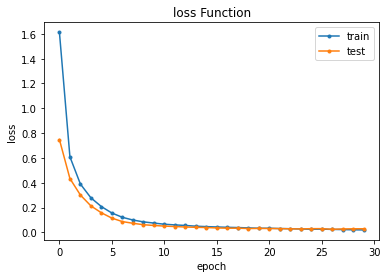


●検証結果
313/313 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.9906

batch_size =  6000
epochs =  30
Test loss: 0.02913229912519455
Test accuracy: 0.9905999898910522

●混同行列(コンフュージョンマトリックス) 横：識別結果、縦：正解データ
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[ 976    0    1    1    0    1    0    0    1    0]
 [   0 1133    0    0    0    0    1    0    1    0]
 [   1    1 1022    1    2    0    0    5    0    0]
 [   0    0    1  999    0    8    0    0    2    0]
 [   0    0    0    0  979    0    1    0    0    2]
 [   1    0    0    1    0  890    0    0    0    0]
 [   5    2    0    1    4    7  935    0    4    0]
 [   0    0    5    1    0    0    0 1018    1    2]
 [   3    

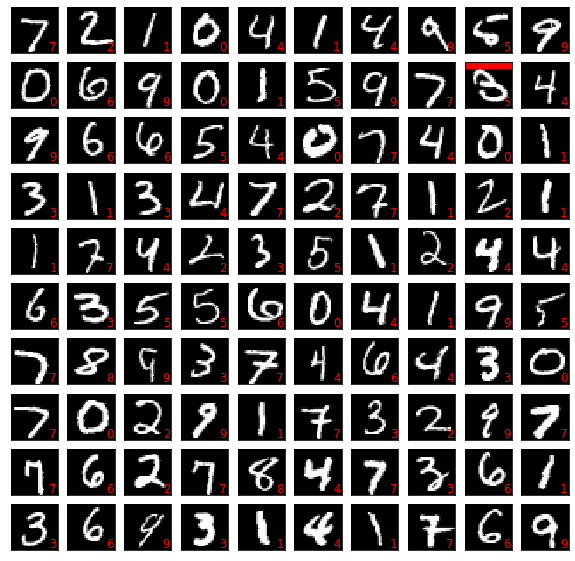

In [2]:
# ------------------------------------------------------------------------------------------------------------
# CNN(Convolutional Neural Network)でMNISTを試す
# ------------------------------------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras import backend as ke
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


# ------------------------------------------------------------------------------------------------------------
# ハイパーパラメータ
# ------------------------------------------------------------------------------------------------------------
# ハイパーパラメータ ⇒ バッチサイズ、エポック数
# 例えば、訓練データが60,000個で、batch_sizeを6,000とした場合、
# 学習データをすべて使うのに60,000個÷6,000＝10回のパラメータ更新が行われる。
# これを1epochと言う。epochが10であれば、10×10＝100回のパラメータ更新が行われることとなる。
# epoch数は損失関数(コスト関数)の値がほぼ収束するまでに設定する。
batch_size = 6000           # バッチサイズ
epochs = 30                 # エポック数


# ------------------------------------------------------------------------------------------------------------
# 正誤表関数
# ------------------------------------------------------------------------------------------------------------
def show_prediction():
    n_show = 100                                 # 全部は表示すると大変なので一部を表示
    y = model.predict(X_test)
    plt.figure(2, figsize=(10, 10))
    plt.gray()
    for i in range(n_show):
        plt.subplot(10, 10, (i+1))               # subplot(行数, 列数, プロット番号)
        x = X_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12, color='red')
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='red', linewidth=10)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")


# ------------------------------------------------------------------------------------------------------------
# keras backendの表示
# ------------------------------------------------------------------------------------------------------------
# print(ke.backend())
# print(ke.floatx())


# ------------------------------------------------------------------------------------------------------------
# MNISTデータの取得
# ------------------------------------------------------------------------------------------------------------
# 初回はダウンロードが発生するため時間がかかる
# 60,000枚の28x28ドットで表現される10個の数字の白黒画像と10,000枚のテスト用画像データセット
# ダウンロード場所：'~/.keras/datasets/'
# ※MNISTのデータダウンロードがNGとなる場合は、PROXYの設定を見直してください
#
# MNISTデータ
#  ├ 教師データ (60,000個)
#  │  ├ 画像データ
#  │  └ ラベルデータ
#  │
#  └ 検証データ (10,000個)
#     ├ 画像データ
#     └ ラベルデータ

# ↓教師データ          ↓検証データ
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# ↑画像    ↑ラベル     ↑画像    ↑ラベル


# ------------------------------------------------------------------------------------------------------------
# 画像データ(教師データ、検証データ)のリシェイプ
# ------------------------------------------------------------------------------------------------------------
img_rows, img_cols = 28, 28
if ke.image_data_format() == 'channels_last':
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
else:
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)

# 配列の整形と、色の範囲を0～255 → 0～1に変換
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# ------------------------------------------------------------------------------------------------------------
# ラベルデータ(教師データ、検証データ)のベクトル化
# ------------------------------------------------------------------------------------------------------------
y_train = np_utils.to_categorical(y_train)      # 教師ラベルのベクトル化
y_test = np_utils.to_categorical(y_test)        # 検証ラベルのベクトル化



# ------------------------------------------------------------------------------------------------------------
# ネットワークの定義 (keras)
# ------------------------------------------------------------------------------------------------------------
print("")
print("●ネットワーク定義")
model = Sequential()

# 入力層 28×28×3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))     # 01層：畳込み層64枚
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))                                          # 02層：畳込み層64枚
model.add(MaxPooling2D(pool_size=(2, 2)))                                                                 # 03層：プーリング層
model.add(Dropout(0.30))                                                                                  # 04層：ドロップアウト
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))                                          # 05層：畳込み層64枚
model.add(MaxPooling2D(pool_size=(2, 2)))                                                                 # 06層：プーリング層
model.add(Flatten())                                                                                      # 08層：次元変換
model.add(Dense(128, activation='relu'))                                                                  # 09層：全結合出力128
model.add(Dense(10, activation='softmax'))                                                                # 10層：全結合出力10

# model表示
model.summary()

# コンパイル
# 損失関数 ：categorical_crossentropy (クロスエントロピー)
# 最適化   ：Adam
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

print("")
print("●学習スタート")
f_verbose = 1  # 0:表示なし、1：詳細表示、2：表示
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 validation_data=(X_test, y_test),
                 verbose=f_verbose)

# モデル保存
model.save('colab_mnist.hdf5')


# ------------------------------------------------------------------------------------------------------------
# 損失値グラフ化
# ------------------------------------------------------------------------------------------------------------
# Accuracy (正解率)
plt.plot(range(epochs), hist.history['accuracy'], marker='.')
plt.plot(range(epochs), hist.history['val_accuracy'], marker='.')
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# loss (損失関数)
plt.plot(range(epochs), hist.history['loss'], marker='.')
plt.plot(range(epochs), hist.history['val_loss'], marker='.')
plt.title('loss Function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


# ------------------------------------------------------------------------------------------------------------
# テストデータ検証
# ------------------------------------------------------------------------------------------------------------
print("")
print("●検証結果")
t_verbose = 1  # 0:表示なし、1：詳細表示、2：表示
score = model.evaluate(X_test, y_test, verbose=t_verbose)

print("")
print("batch_size = ", batch_size)
print("epochs = ", epochs)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


print("")
print("●混同行列(コンフュージョンマトリックス) 横：識別結果、縦：正解データ")
predict_classes = model.predict_classes(X_test[1:60000, ], batch_size=batch_size)
true_classes = np.argmax(y_test[1:60000], 1)
print(confusion_matrix(true_classes, predict_classes))


# ------------------------------------------------------------------------------------------------------------
# 正誤表表示
# ------------------------------------------------------------------------------------------------------------
show_prediction()
plt.show()


## MNIST model is downloaded

Replace the hdf5 file:(Mnister/colab_mnist.hdf5). 


In [3]:
from google.colab import files
files.download('/content/colab_mnist.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>